In [1]:
import awkward as ak
import pickle
import matplotlib.pyplot as plt

In [2]:
PLOT_CONFIG = { 
    # Fonts & Sizes (Compact for Paper)
    'FONT_FAMILY': 'serif',
    'FONT_SIZE': 20,
    'TITLE_SIZE': 22,
    'AXIS_LABEL_SIZE': 20,
    'TICK_SIZE': 20,
    'LEGEND_SIZE': 14,
    'LINE_WIDTH': 2.0,
    'DPI': 400,
    
    # --- 1D HISTOGRAM SETTINGS ---
    'BINS_1D': 50,
    'LOG_Y_1D': True,           # Y-axis log scale
    'COLOR_GT': '#333333',
    'COLOR_PRED': '#E24A33',
    
    # 1D Axis Ranges (Set to None for Auto)
    'X_LIM_1D': [0, 1.0],       # Correction Factor Range
    'Y_LIM_1D': [10, 1e5],      # Count Range (Min > 0 for Log)      
}



plt.rcParams.update({

    # 'font.family': PLOT_CONFIG['FONT_FAMILY'],

    'font.size': PLOT_CONFIG['FONT_SIZE'],

    'axes.labelsize': PLOT_CONFIG['AXIS_LABEL_SIZE'],

    'axes.titlesize': PLOT_CONFIG['TITLE_SIZE'],

    'xtick.labelsize': PLOT_CONFIG['TICK_SIZE'],

    'ytick.labelsize': PLOT_CONFIG['TICK_SIZE'],

    'legend.fontsize': PLOT_CONFIG['LEGEND_SIZE'],

    'lines.linewidth': PLOT_CONFIG['LINE_WIDTH'],


    'savefig.bbox': 'tight',

    'savefig.pad_inches': 0.05,

})

In [3]:
model_list = ["PhyGHT", "ParticleNet", "PUMINet"]
mu=60

In [4]:
def get_filename_from_model(model):
    return "data/"+model+"_mu"+str(mu)+"_10k_events_test_results.pkl"

In [5]:
def load_jets_from_file(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data["jets"]

In [6]:
def get_resolution(jet_array):
    mask = (jet_array[:,:,4]>0.2)&(jet_array[:,:,5]>0.1)
    jet_true_efrac = jet_array[mask][:,:,4]
    jet_pred_efrac = jet_array[mask][:,:,6]
    jet_energy_resolution = (jet_pred_efrac - jet_true_efrac) / jet_true_efrac
    jet_true_mfrac = jet_array[mask][:,:,5]
    jet_pred_mfrac = jet_array[mask][:,:,7]
    jet_mass_resolution = (jet_pred_mfrac - jet_true_mfrac) / jet_true_mfrac
    return jet_energy_resolution, jet_mass_resolution

In [7]:
def get_results(model):
    filename = get_filename_from_model(model)
    jets = load_jets_from_file(filename)
    energy_resolution, mass_resolution = get_resolution(jets)
    print("Results for ", model)
    print("\tEnergy Mean: ", ak.mean(energy_resolution))
    print("\tEnergy Variance: ", ak.std(energy_resolution))
    print("\tMass Mean: ", ak.mean(mass_resolution))
    print("\tMass Variance: ", ak.std(mass_resolution))
    print()
    return [energy_resolution, mass_resolution]

In [8]:
results = {}
for model in model_list:
    results[model] = get_results(model)

Results for  PhyGHT
	Energy Mean:  -0.08285179163961441
	Energy Variance:  0.2222833128039151
	Mass Mean:  -0.05077614331060292
	Mass Variance:  0.3077686404571911

Results for  ParticleNet
	Energy Mean:  -0.12457307612507276
	Energy Variance:  0.34096162920342776
	Mass Mean:  -0.10357723970988962
	Mass Variance:  0.4349926727654804

Results for  PUMINet
	Energy Mean:  -0.05514026363017785
	Energy Variance:  0.22814700293979184
	Mass Mean:  -0.03579975266653949
	Mass Variance:  0.3360966877654848



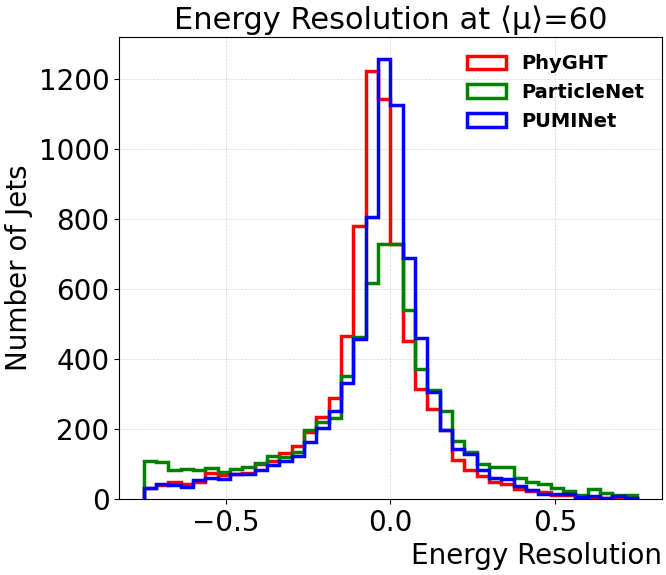

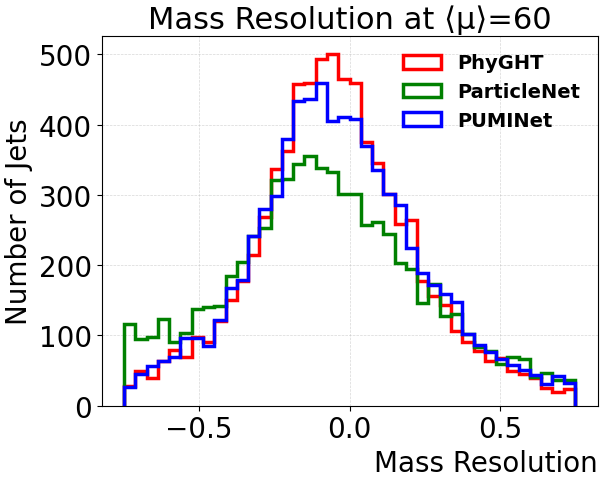

In [9]:
color_list = ['r','g','b']

plt.figure(figsize=(7, 6))
plt.title("Energy Resolution at \u27E8\u03BC\u27E9="+str(mu))
for i, model in enumerate(results):
    plt.hist(ak.ravel(results[model][0]), histtype='step', label=model, color=color_list[i], bins=40, range=(-0.75,0.75), linewidth=2.5)
plt.xlabel('Energy Resolution',loc='right')
plt.ylabel('Number of Jets')
plt.legend(frameon=False, loc='upper right', prop={'weight': 'bold'})
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.savefig("Energy_Resolution_mu"+str(mu)+".png")
plt.show()

plt.title("Mass Resolution at \u27E8\u03BC\u27E9="+str(mu))
for i, model in enumerate(results):
    plt.hist(ak.ravel(results[model][1]), histtype='step', label=model, color=color_list[i], bins=40, range=(-0.75,0.75), linewidth=2.5)
plt.legend()
plt.xlabel('Mass Resolution',loc='right')
plt.ylabel('Number of Jets')
plt.legend(frameon=False, loc='upper right', prop={'weight': 'bold'})
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.savefig("Mass_Resolution_mu"+str(mu)+".png")
plt.show()